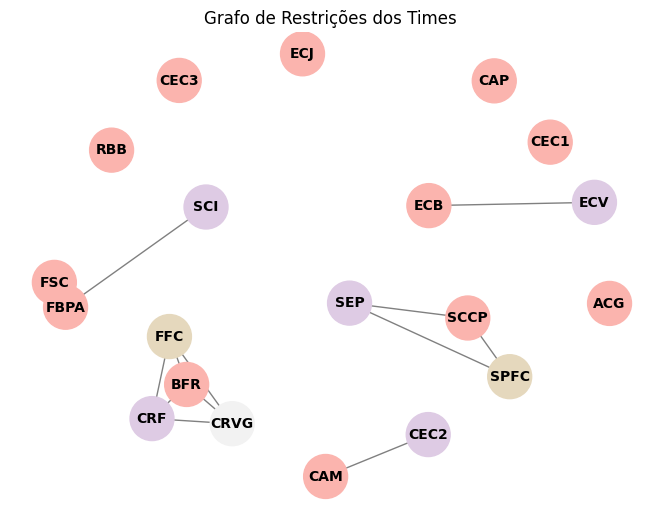

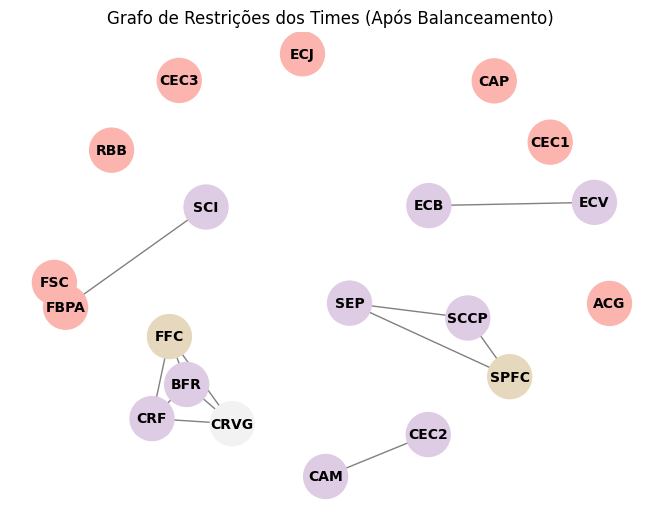

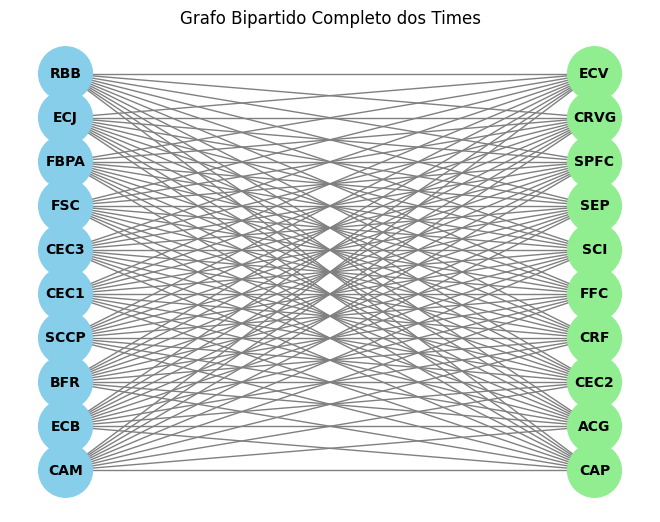

Rodada 1
CAM vs CAP
ECB vs ACG
BFR vs CEC2
SCCP vs CRF
CEC1 vs FFC
CEC3 vs SCI
FSC vs SEP
FBPA vs SPFC
ECJ vs CRVG
RBB vs ECV
Total de jogos = 10

Rodada 2
CAM vs ACG
ECB vs CEC2
BFR vs CRF
SCCP vs FFC
CEC1 vs SCI
CEC3 vs SEP
FSC vs SPFC
FBPA vs CRVG
ECJ vs ECV
RBB vs CAP
Total de jogos = 10

Rodada 3
CAM vs CEC2
ECB vs CRF
BFR vs FFC
SCCP vs SCI
CEC1 vs SEP
CEC3 vs SPFC
FSC vs CRVG
FBPA vs ECV
ECJ vs CAP
RBB vs ACG
Total de jogos = 10

Rodada 4
CAM vs CRF
ECB vs FFC
BFR vs SCI
SCCP vs SEP
CEC1 vs SPFC
CEC3 vs CRVG
FSC vs ECV
FBPA vs CAP
ECJ vs ACG
RBB vs CEC2
Total de jogos = 10

Rodada 5
CAM vs FFC
ECB vs SCI
BFR vs SEP
SCCP vs SPFC
CEC1 vs CRVG
CEC3 vs ECV
FSC vs CAP
FBPA vs ACG
ECJ vs CEC2
RBB vs CRF
Total de jogos = 10

Rodada 6
CAM vs SCI
ECB vs SEP
BFR vs SPFC
SCCP vs CRVG
CEC1 vs ECV
CEC3 vs CAP
FSC vs ACG
FBPA vs CEC2
ECJ vs CRF
RBB vs FFC
Total de jogos = 10

Rodada 7
CAM vs SEP
ECB vs SPFC
BFR vs CRVG
SCCP vs ECV
CEC1 vs CAP
CEC3 vs ACG
FSC vs CEC2
FBPA vs CRF
ECJ vs FFC
RBB

In [1]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
from networkx.algorithms.coloring import greedy_color

# Criação do grafo
G = nx.Graph()

# Adicionando vértices (times)
times = ["CAP", "ACG", "CAM", "ECB", "BFR", "SCCP", "CEC1", "CEC2", "CEC3", "CRF", "FFC", "FSC", "FBPA", "SCI", "ECJ", "SEP", "RBB", "SPFC", "CRVG", "ECV"]
G.add_nodes_from(times)

# Adicionando arestas (restrições)
restricoes = [("CAM", "CEC2"), ("ECB", "ECV"), ("BFR", "CRF"), ("BFR", "FFC"), ("BFR", "CRVG"),
              ("SCCP", "SEP"), ("SCCP", "SPFC"), ("CRF", "FFC"), ("CRF", "CRVG"), ("FFC", "CRVG"),
              ("FBPA", "SCI"), ("SEP", "SPFC")]

G.add_edges_from(restricoes)

# Aplicando o algoritmo de coloração
coloracao = greedy_color(G, strategy="DSATUR")
colors = [coloracao[node] for node in G.nodes]

# Plotando o grafo
np.random.seed(8)
pos = nx.spring_layout(G, k=1)
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=1000, edge_color='gray', font_size=10, font_weight='bold', cmap=plt.cm.Pastel1)
plt.title("Grafo de Restrições dos Times")
plt.show()

# Análise da distribuição das cores
cores_por_node = {i: 0 for i in range(max(colors) + 1)}
lista_vermelhos = []

for node in coloracao:
    cores_por_node[coloracao[node]] += 1
    if coloracao[node] == 0:
        lista_vermelhos.append(node)

# Balanceamento das cores
for time in lista_vermelhos:
    if cores_por_node[0] > cores_por_node[1]:
        coloracao[time] = 1
        cores_por_node[0] -= 1
        cores_por_node[1] += 1

# Atualizando a visualização após balanceamento
colors = [coloracao[node] for node in G.nodes]
np.random.seed(8)
pos = nx.spring_layout(G, k=1)
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=1000, edge_color='gray', font_size=10, font_weight='bold', cmap=plt.cm.Pastel1)
plt.title("Grafo de Restrições dos Times (Após Balanceamento)")
plt.show()

# Listas de nós para o grafo bipartido
casa = ['CAM', 'ECB', 'BFR', 'SCCP', 'CEC1', 'CEC3', 'FSC', 'FBPA', 'ECJ', 'RBB']
visitantes = ['CAP', 'ACG', 'CEC2', 'CRF', 'FFC', 'SCI', 'SEP', 'SPFC', 'CRVG', 'ECV']

# Criação do grafo bipartido
B = nx.Graph()
B.add_nodes_from(casa, bipartite=0)
B.add_nodes_from(visitantes, bipartite=1)

# Adicionando todas as arestas possíveis entre os conjuntos
arestas = [(c, v) for c in casa for v in visitantes]
B.add_edges_from(arestas)

# Extração dos conjuntos de nós
pos = {node: (1, i) for i, node in enumerate(casa)}
pos.update({node: (2, i) for i, node in enumerate(visitantes)})

# Desenho do grafo bipartido
nx.draw(B, pos, with_labels=True, node_color=['skyblue' if node in casa else 'lightgreen' for node in B.nodes()],
        node_size=1500, edge_color='gray', font_size=10, font_weight='bold')
plt.title("Grafo Bipartido Completo dos Times")
plt.show()

# Gerando e salvando as rodadas (times da casa vs visitantes)
num_rodadas = len(visitantes)
num_times_casa = len(casa)
rodadas = []

for i in range(num_rodadas):
    rodada = []
    for j in range(num_times_casa):
        time_casa = casa[j]
        time_visitante = visitantes[(i + j) % num_rodadas]
        jogo = f"{time_casa} vs {time_visitante}"
        rodada.append(jogo)
    rodadas.append(rodada)

# Gerando e salvando as rodadas "dual" (visitantes vs times da casa)
for i in range(num_rodadas):
    rodada = []
    for j in range(num_times_casa):
        time_casa = visitantes[j]
        time_visitante = casa[(i + j) % num_rodadas]
        jogo = f"{time_casa} vs {time_visitante}"
        rodada.append(jogo)
    rodadas.append(rodada)

# Gerando todos os jogos entre os times da casa
num_times = len(casa)
num_rodadas_casa = num_times - 1

for x in range(2):
    for i in range(num_rodadas_casa):
        rodada = []
        for j in range(num_times // 2):
            time_casa = casa[j]
            time_visitante = casa[-(j + 1)]
            jogo = f"{time_casa} vs {time_visitante}"
            rodada.append(jogo)
        rodadas.append(rodada)
    
        # Rotaciona os times, mantendo o primeiro fixo
        casa = [casa[0]] + [casa[-1]] + casa[1:-1]
    casa.reverse()

# Exibindo as rodadas
contador = 1
for rodada in rodadas:
    print(f"Rodada {contador}")
    contador1 = 0
    for jogos in rodada:
        contador1 += 1
        print(jogos)
    print(f"Total de jogos = {contador1}")
    print("")
    contador += 1


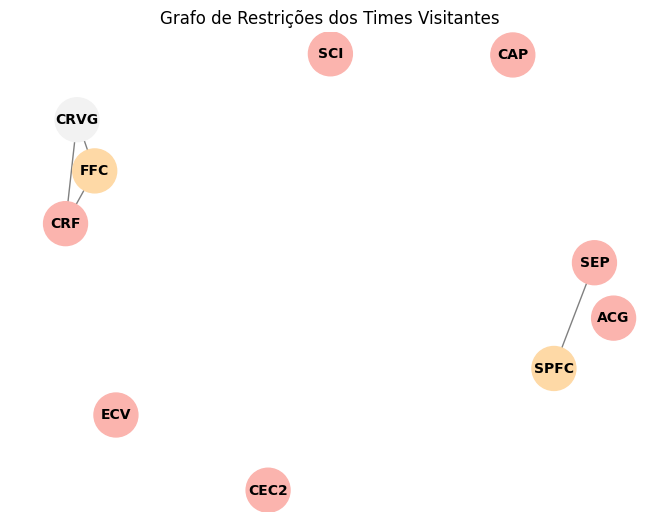

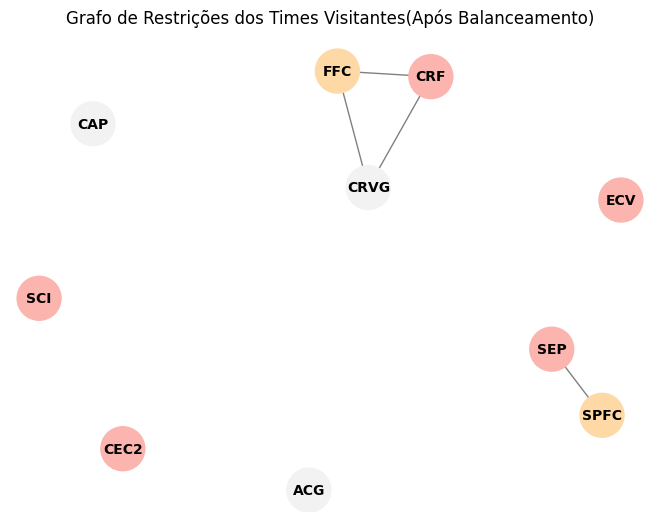

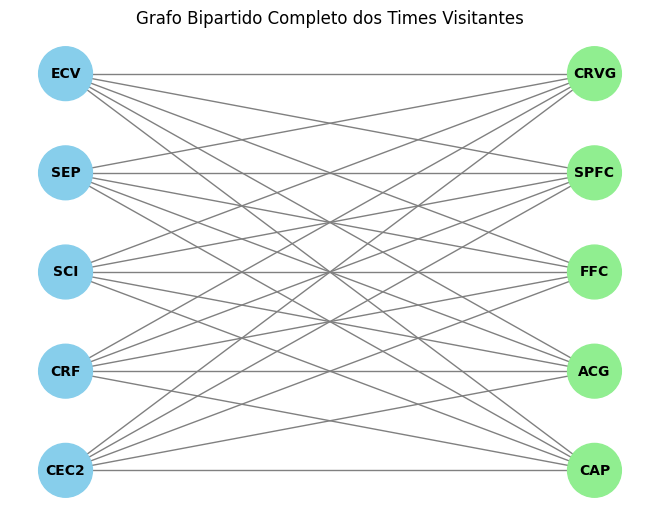

Rodada 1:
CAM vs CAP
ECB vs ACG
BFR vs CEC2
SCCP vs CRF
CEC1 vs FFC
CEC3 vs SCI
FSC vs SEP
FBPA vs SPFC
ECJ vs CRVG
RBB vs ECV
quantidade de jogos 10 

Rodada 2:
CAM vs ACG
ECB vs CEC2
BFR vs CRF
SCCP vs FFC
CEC1 vs SCI
CEC3 vs SEP
FSC vs SPFC
FBPA vs CRVG
ECJ vs ECV
RBB vs CAP
quantidade de jogos 10 

Rodada 3:
CAM vs CEC2
ECB vs CRF
BFR vs FFC
SCCP vs SCI
CEC1 vs SEP
CEC3 vs SPFC
FSC vs CRVG
FBPA vs ECV
ECJ vs CAP
RBB vs ACG
quantidade de jogos 10 

Rodada 4:
CAM vs CRF
ECB vs FFC
BFR vs SCI
SCCP vs SEP
CEC1 vs SPFC
CEC3 vs CRVG
FSC vs ECV
FBPA vs CAP
ECJ vs ACG
RBB vs CEC2
quantidade de jogos 10 

Rodada 5:
CAM vs FFC
ECB vs SCI
BFR vs SEP
SCCP vs SPFC
CEC1 vs CRVG
CEC3 vs ECV
FSC vs CAP
FBPA vs ACG
ECJ vs CEC2
RBB vs CRF
quantidade de jogos 10 

Rodada 6:
CAM vs SCI
ECB vs SEP
BFR vs SPFC
SCCP vs CRVG
CEC1 vs ECV
CEC3 vs CAP
FSC vs ACG
FBPA vs CEC2
ECJ vs CRF
RBB vs FFC
quantidade de jogos 10 

Rodada 7:
CAM vs SEP
ECB vs SPFC
BFR vs CRVG
SCCP vs ECV
CEC1 vs CAP
CEC3 vs ACG
FSC vs 

In [2]:
#Novo grafo
G2 = nx.Graph()
G2.add_nodes_from(visitantes)
restricoes = [("FFC","CRF"),("FFC","CRVG"),("CRF","CRVG"),("SEP","SPFC")]
G2.add_edges_from(restricoes)
coloracao = greedy_color(G2, strategy="DSATUR")
colors = [coloracao[node] for node in G2.nodes]

# Plotando o grafo
np.random.seed(8)
pos = nx.spring_layout(G2, k=1)  # Ajuste o valor de k para controlar a distância
nx.draw(G2, pos, with_labels=True, node_color=colors, node_size=1000, edge_color='gray', font_size=10, font_weight='bold', cmap=plt.cm.Pastel1)
plt.title("Grafo de Restrições dos Times Visitantes")
plt.show()
cores_por_node = {}
lista_vermelhos = []
cores_por_node[0] = 0
cores_por_node[1] = 0
cores_por_node[2] = 0
cores_por_node[3] = 0
for node in coloracao:
    if coloracao[node] == 0:
        cores_por_node[0] += 1
        lista_vermelhos.append(node)
    
    if coloracao[node] == 1:
        cores_por_node[1] += 1
    
    if coloracao[node] == 2:
        cores_por_node[2] += 1
    
    if coloracao[node] == 3:
        cores_por_node[3] += 1

nodes = []
casa = []
visitantes = []
for node in G2.nodes:
    nodes.append(node)
for i in range(10):
    if colors[i] == 0:
        casa.append(nodes[i])
    else:
        visitantes.append(nodes[i])

#Balanceamento das cores
for tuple in restricoes:
    for time in tuple:
        if time in lista_vermelhos:
            lista_vermelhos.remove(time)
for i in range(2):
    coloracao[lista_vermelhos[0]] = 2
    lista_vermelhos.pop(0)
    
cores_por_node[0] = 0
cores_por_node[1] = 0
cores_por_node[2] = 0
cores_por_node[3] = 0

for node in coloracao:
    if coloracao[node] == 0:
        cores_por_node[0] += 1
        lista_vermelhos.append(node)
    
    if coloracao[node] == 1:
        cores_por_node[1] += 1
    
    if coloracao[node] == 2:
        cores_por_node[2] += 1
    
    if coloracao[node] == 3:
        cores_por_node[3] += 1

colors = [coloracao[node] for node in G2.nodes]

# Plotando o grafo
np.random.seed(8)
pos = nx.spring_layout(G2)
pos = nx.spring_layout(G2, k=1)  # Ajuste o valor de k para controlar a distância
nx.draw(G2, pos, with_labels=True, node_color=colors, node_size=1000, edge_color='gray', font_size=10, font_weight='bold', cmap=plt.cm.Pastel1)
plt.title("Grafo de Restrições dos Times Visitantes(Após Balanceamento)")
plt.show()

nodes = []
casa = []
visitantes = []
for node in G2.nodes:
    nodes.append(node)
for i in range(10):
    if colors[i] == 0:
        casa.append(nodes[i])
    else:
        visitantes.append(nodes[i])

# Criação do grafo bipartido
B2 = nx.Graph()
B2.add_nodes_from(casa, bipartite=0)
B2.add_nodes_from(visitantes, bipartite=1)
# Adicionando todas as arestas possíveis entre os conjuntos
arestas = [(c, v) for c in casa for v in visitantes]
B2.add_edges_from(arestas)

# Extração dos conjuntos de nós
pos = {node: (1, i) for i, node in enumerate(casa)}
pos.update({node: (2, i) for i, node in enumerate(visitantes)})

# Desenho do grafo bipartido
nx.draw(B2, pos, with_labels=True, node_color=['skyblue' if node in casa else 'lightgreen' for node in B2.nodes()],
        node_size=1500, edge_color='gray', font_size=10, font_weight='bold')
plt.title("Grafo Bipartido Completo dos Times Visitantes")
plt.show()

# Times da casa e visitantes
casa = ['CEC2', 'CRF', 'SCI', 'SEP', 'ECV']
visitantes = ['CAP', 'ACG', 'FFC', 'SPFC', 'CRVG']
num_times = len(casa)
num_rodadas = num_times
cont = 20
# Embaralha os times visitantes
visitantes_shuffled = visitantes[:]
    
for i in range(num_rodadas):
    rodada = []
    rodada_reversa = []
    # Garante que os times visitantes não se repitam em uma rodada
    for j in range(num_times):
        time_casa = casa[j]
        time_visitante = visitantes_shuffled[j]
        jogo = f"{time_casa} vs {time_visitante}"
        jogo_reverso = f"{time_visitante} vs {time_casa}"
        rodadas[cont].append(jogo)
        rodadas[cont+5].append(jogo_reverso)
    cont += 1
        
    # Rotaciona os visitantes para a próxima rodada
    visitantes_shuffled = visitantes_shuffled[1:] + [visitantes_shuffled[0]]

# Gerando todos os jogos entre os times da casa
num_times = len(casa)
num_rodadas_casa = num_times - 1
cont = 30
for x in range(2):
    for i in range(num_rodadas_casa):
        rodada = []
        for j in range(num_times // 2):
            time_casa = casa[j]
            time_visitante = casa[-(j + 1)]
            jogo = f"{time_casa} vs {time_visitante}"
            rodadas[cont].append(jogo)
        cont += 1
    
        # Rotaciona os times, mantendo o primeiro fixo
        casa = [casa[0]] + [casa[-1]] + casa[1:-1]
    casa.reverse()
contador = 0
for idx, rodada in enumerate(rodadas):
    print(f"Rodada {idx + 1}:")
    for jogo in rodada:
        contador += 1
        print(jogo)
    print(f"quantidade de jogos {contador} \n")
    contador = 0


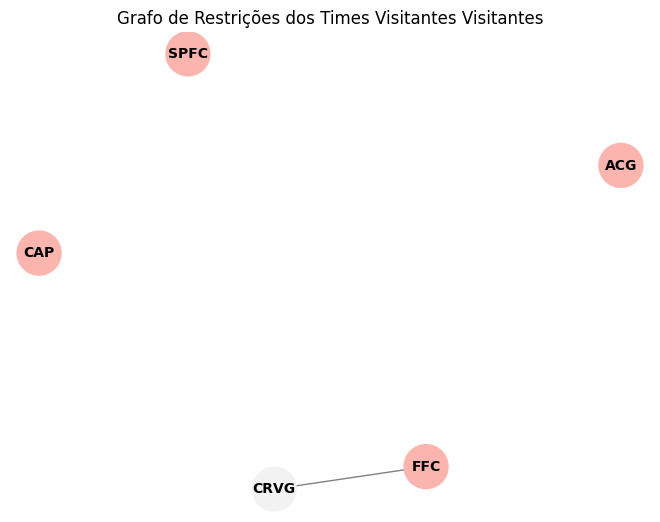

In [3]:
G3 = nx.Graph()
G3.add_nodes_from(visitantes)
restricoes = [("FFC","CRVG")]
G3.add_edges_from(restricoes)
coloracao = greedy_color(G3, strategy="DSATUR")
colors = [coloracao[node] for node in G3.nodes]

# Plotando o grafo
np.random.seed(8)
pos = nx.spring_layout(G3)
pos = nx.spring_layout(G3, k=1)  # Ajuste o valor de k para controlar a distância
nx.draw(G3, pos, with_labels=True, node_color=colors, node_size=1000, edge_color='gray', font_size=10, font_weight='bold', cmap=plt.cm.Pastel1)
plt.title("Grafo de Restrições dos Times Visitantes Visitantes")
plt.show()


In [4]:
casa = ['CAP','SPFC','CRVG','FFC','ACG']

num_times = len(casa)
    
# Para garantir que cada time jogue contra todos os outros times da casa
cont = 30
for x in range(2):
    for i in range(num_times - 1):
        rodada = []
        for j in range(0, num_times // 2):
            time_casa_1 = casa[j]
            time_casa_2 = casa[-(j + 1)]
            rodadas[cont].append(f"{time_casa_1} vs {time_casa_2}")
        cont += 1
        # Rotaciona os times, mantendo o primeiro fixo
        casa = [casa[0]] + [casa[-1]] + casa[1:-1]
    casa.reverse()

In [5]:
for idx, rodada in enumerate(rodadas):
    print(f"Rodada {idx + 1}:")
    for jogo in rodada:
        contador += 1
        print(jogo)
    print(f"quantidade de jogos {contador} \n")
    contador = 0

Rodada 1:
CAM vs CAP
ECB vs ACG
BFR vs CEC2
SCCP vs CRF
CEC1 vs FFC
CEC3 vs SCI
FSC vs SEP
FBPA vs SPFC
ECJ vs CRVG
RBB vs ECV
quantidade de jogos 10 

Rodada 2:
CAM vs ACG
ECB vs CEC2
BFR vs CRF
SCCP vs FFC
CEC1 vs SCI
CEC3 vs SEP
FSC vs SPFC
FBPA vs CRVG
ECJ vs ECV
RBB vs CAP
quantidade de jogos 10 

Rodada 3:
CAM vs CEC2
ECB vs CRF
BFR vs FFC
SCCP vs SCI
CEC1 vs SEP
CEC3 vs SPFC
FSC vs CRVG
FBPA vs ECV
ECJ vs CAP
RBB vs ACG
quantidade de jogos 10 

Rodada 4:
CAM vs CRF
ECB vs FFC
BFR vs SCI
SCCP vs SEP
CEC1 vs SPFC
CEC3 vs CRVG
FSC vs ECV
FBPA vs CAP
ECJ vs ACG
RBB vs CEC2
quantidade de jogos 10 

Rodada 5:
CAM vs FFC
ECB vs SCI
BFR vs SEP
SCCP vs SPFC
CEC1 vs CRVG
CEC3 vs ECV
FSC vs CAP
FBPA vs ACG
ECJ vs CEC2
RBB vs CRF
quantidade de jogos 10 

Rodada 6:
CAM vs SCI
ECB vs SEP
BFR vs SPFC
SCCP vs CRVG
CEC1 vs ECV
CEC3 vs CAP
FSC vs ACG
FBPA vs CEC2
ECJ vs CRF
RBB vs FFC
quantidade de jogos 10 

Rodada 7:
CAM vs SEP
ECB vs SPFC
BFR vs CRVG
SCCP vs ECV
CEC1 vs CAP
CEC3 vs ACG
FSC vs 